# Entangling qubits

If we have two entangled qubits, we can encode a 2-bit message by applying gates to only one of the qubits. The message can then be read out by disentangling the qubits.

A third party acts as a creator of maximally-entangled Bell states; here we use $|\Phi+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$. Specifically, the Hadamard gate transforms $|00\rangle$ into a superposition of $\frac{\left( |0\rangle + |1\rangle \right)|0\rangle}{\sqrt{2}}$. This state then acts as a control input to the CNOT gate, which inverts the target qubit when the control is 1, and we end up with the entangled state.

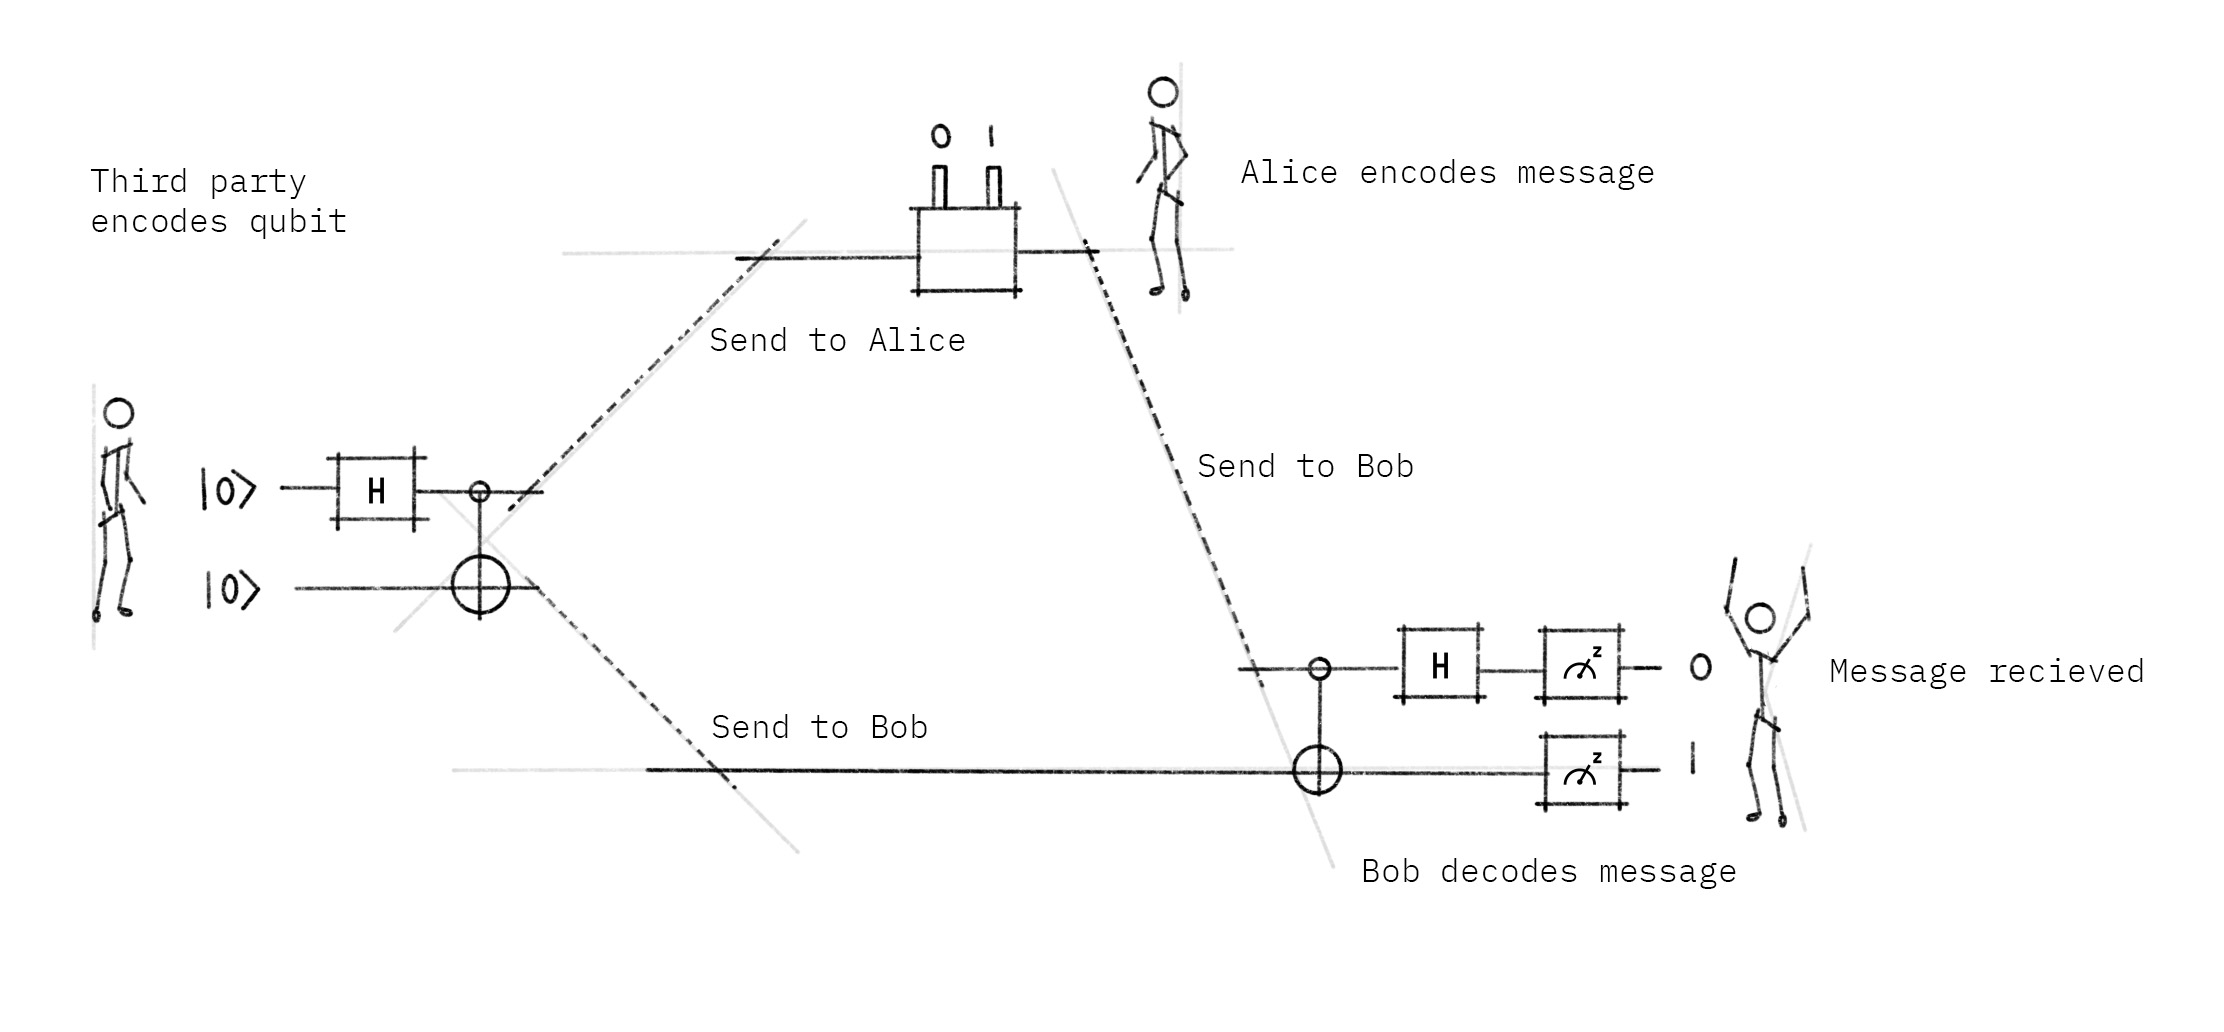

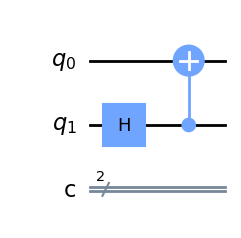

In [30]:
# Create entangled qubits
from qiskit import QuantumCircuit
qc_charlie = QuantumCircuit(2, 2)
qc_charlie.h(1)  # CNOT controlled by qubit 0 and targeting qubit 2
qc_charlie.cx(1,0)  # CNOT controlled by qubit 1 and targeting qubit 2

qc_charlie.draw(output='mpl')

This third party can directly send one qubit to Bob, and then the other to Alice. Alice can encode her two qubit message by manipulating just this single qubit, and send only this one qubit to Bob.

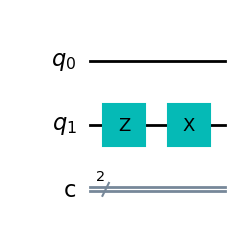

In [42]:
MESSAGE = '11'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

qc_alice.draw(output='mpl')

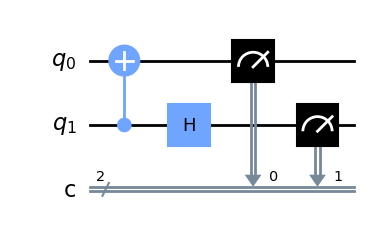

In [43]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw(output='mpl')

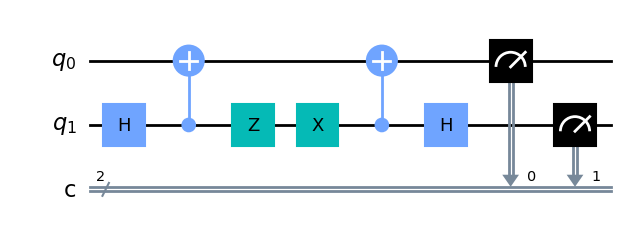

In [47]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))

complete_qc.draw(output='mpl')

In [46]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')
backend.run(complete_qc).result().get_counts()

{'11': 1024}